In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib.mlab as mlab
from scipy.stats import norm
import pandas as pd
import seaborn as sns

In [2]:
data1 = pd.read_csv("over_point_to_user.csv",index_col=[0])
data2 = data1.loc[:,["user_id","over_point"]]
data2 = data2.drop_duplicates(subset="user_id")
data2 = data2.sort_values("over_point",ascending=False)
data2.index = range(len(data2))

data3 = data2.loc[180:184]

del data1["over_point"]

data4 = pd.merge(data1,data3,on="user_id")
data4
hours = []
for i in range(len(data4)):
    hours.append(int(data4.iloc[i].loc["hours"]))
data4["hours"] = hours
data4

,case_id,case_type,final_score,user_id,upload_time,score,days,hours,upload_time_stamp,over_point
0,2791,array,100.0,60901,2020-02-24 14:51:58.287,100.0,8,14,1582527118287,692.628076
1,2790,array,100.0,60901,2020-02-24 14:28:24.079,100.0,8,14,1582525704079,692.628076
2,2603,array,100.0,60901,2020-02-29 16:09:04.419,100.0,13,16,1582963744419,692.628076
3,2789,array,100.0,60901,2020-02-20 15:23:42.258,100.0,4,15,1582183422258,692.628076
4,2800,array,100.0,60901,2020-02-27 11:09:35.941,100.0,11,11,1582772975941,692.628076
...,...,...,...,...,...,...,...,...,...,...
1357,2773,sorting_algorithm,100.0,60662,2020-03-16 23:26:57.553,100.0,29,23,1584372417553,691.840476
1358,2529,sorting_algorithm,100.0,60662,2020-03-16 22:27:53.556,100.0,29,22,1584368873556,691.840476
1359,2528,sorting_algorithm,100.0,60662,2020-02-21 22:35:45.219,100.0,5,22,1582295745219,691.840476
1360,2539,sorting_algorithm,100.0,60662,2020-03-16 21:59:51.015,100.0,29,21,1584367191015,691.840476


In [10]:
data5 = data4[data4["user_id"]==data3.iloc[0,0]]
data6 = data4[data4["user_id"]==data3.iloc[1,0]]
data7 = data4[data4["user_id"]==data3.iloc[2,0]]
data8 = data4[data4["user_id"]==data3.iloc[3,0]]
data9 = data4[data4["user_id"]==data3.iloc[4,0]]

In [11]:
a = pd.DataFrame(index = range(1,45))
data5_days = data5["days"].value_counts()
data5_days = pd.merge(a,data5_days,left_index=True,right_index=True,how="outer")
data5_days = data5_days.fillna(0)
data6_days = data6["days"].value_counts()
data6_days = pd.merge(a,data6_days,left_index=True,right_index=True,how="outer")
data6_days = data6_days.fillna(0)
data7_days = data7["days"].value_counts()
data7_days = pd.merge(a,data7_days,left_index=True,right_index=True,how="outer")
data7_days = data7_days.fillna(0)
data8_days = data8["days"].value_counts()
data8_days = pd.merge(a,data8_days,left_index=True,right_index=True,how="outer")
data8_days = data8_days.fillna(0)
data9_days = data9["days"].value_counts()
data9_days = pd.merge(a,data9_days,left_index=True,right_index=True,how="outer")
data9_days = data9_days.fillna(0)
data_days = data5_days + data6_days + data7_days + data8_days + data9_days
data_days.index = range(1,45)

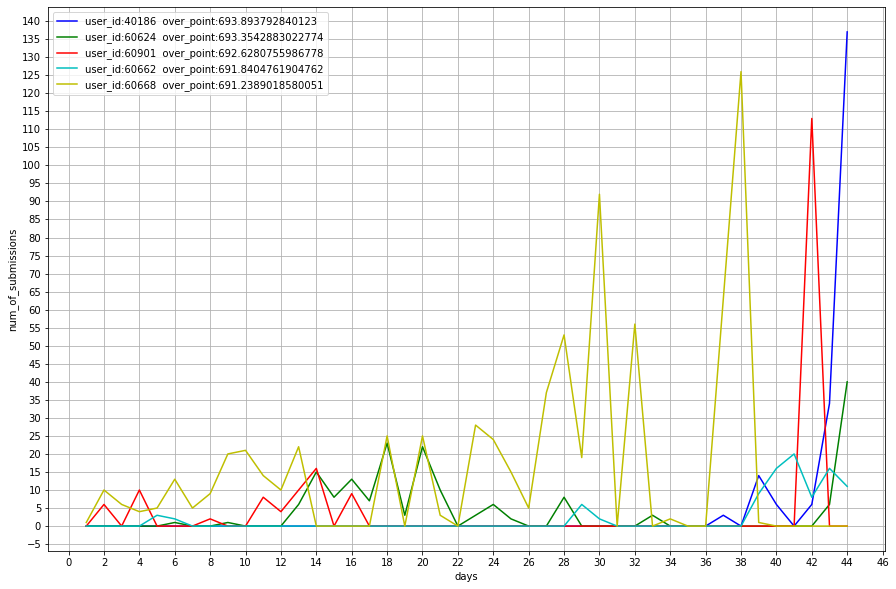

In [12]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(data5_days,"b",label="user_id:"+str(data3.iloc[0,0])+"  over_point:"+str(data3.iloc[0,1]))
ax.plot(data6_days,"g",label="user_id:"+str(data3.iloc[1,0])+"  over_point:"+str(data3.iloc[1,1]))
ax.plot(data7_days,"r",label="user_id:"+str(data3.iloc[2,0])+"  over_point:"+str(data3.iloc[2,1]))
ax.plot(data8_days,"c",label="user_id:"+str(data3.iloc[3,0])+"  over_point:"+str(data3.iloc[3,1]))
ax.plot(data9_days,"y",label="user_id:"+str(data3.iloc[4,0])+"  over_point:"+str(data3.iloc[4,1]))
x_major_locator=plt.MultipleLocator(2)
y_major_locator=plt.MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.legend(loc = "best")
ax.set_xlabel("days")
ax.set_ylabel("num_of_submissions")
fig.savefig("temp/days.png")

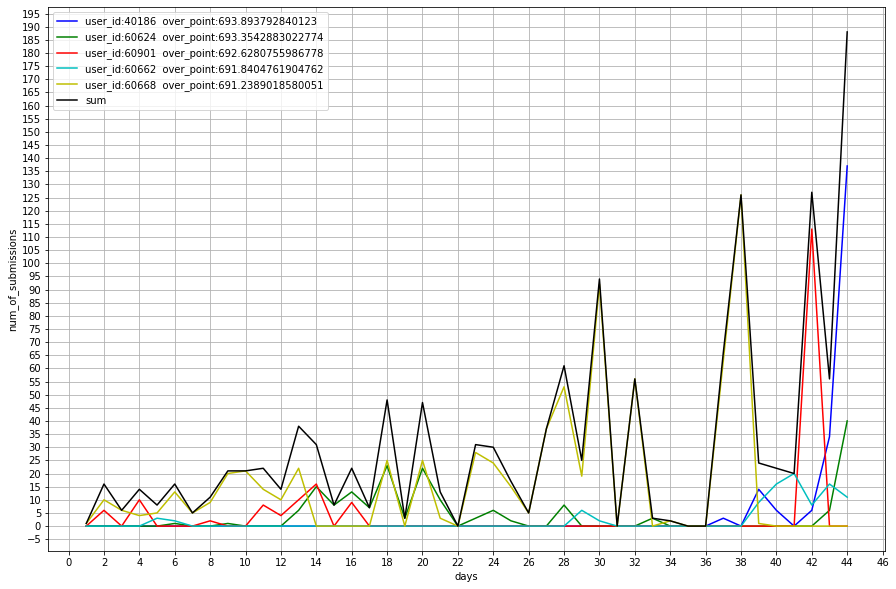

In [13]:
ax.plot(data_days,"black",label="sum")
ax.legend(loc = "best")
fig.savefig("temp/days_with_sum.png")
fig

In [14]:
b = pd.DataFrame(index = np.arange(0,24))
data5_hours = data5["hours"].value_counts()
data5_hours = pd.merge(b,data5_hours,left_index=True,right_index=True,how="outer")
data5_hours = data5_hours.fillna(0)
data6_hours = data6["hours"].value_counts()
data6_hours = pd.merge(b,data6_hours,left_index=True,right_index=True,how="outer")
data6_hours = data6_hours.fillna(0)
data7_hours = data7["hours"].value_counts()
data7_hours = pd.merge(b,data7_hours,left_index=True,right_index=True,how="outer")
data7_hours = data7_hours.fillna(0)
data8_hours = data8["hours"].value_counts()
data8_hours = pd.merge(b,data8_hours,left_index=True,right_index=True,how="outer")
data8_hours = data8_hours.fillna(0)
data9_hours = data9["hours"].value_counts()
data9_hours = pd.merge(b,data9_hours,left_index=True,right_index=True,how="outer")
data9_hours = data9_hours.fillna(0)
data_hours = data5_hours + data6_hours + data7_hours + data8_hours + data9_hours
data_hours.index = range(24)

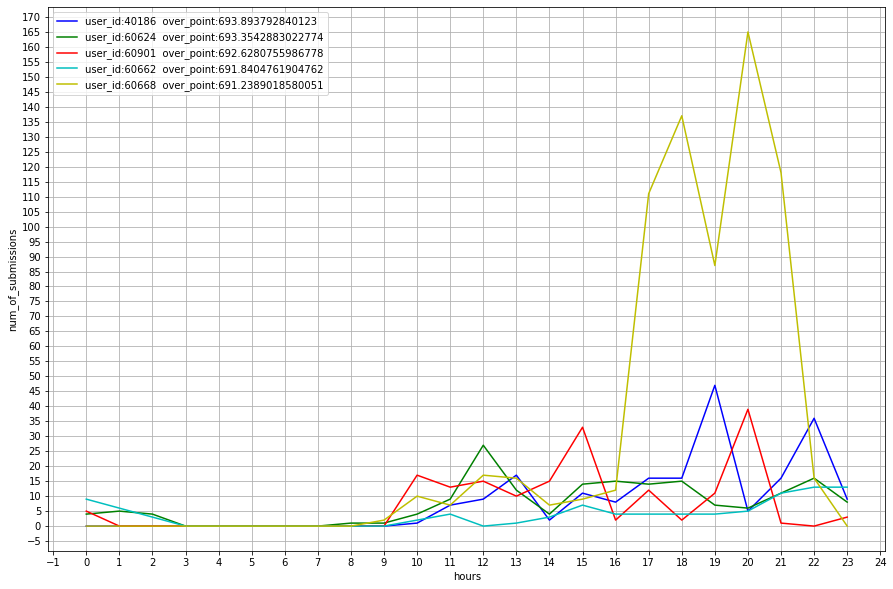

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(data5_hours,"b",label="user_id:"+str(data3.iloc[0,0])+"  over_point:"+str(data3.iloc[0,1]))
ax.plot(data6_hours,"g",label="user_id:"+str(data3.iloc[1,0])+"  over_point:"+str(data3.iloc[1,1]))
ax.plot(data7_hours,"r",label="user_id:"+str(data3.iloc[2,0])+"  over_point:"+str(data3.iloc[2,1]))
ax.plot(data8_hours,"c",label="user_id:"+str(data3.iloc[3,0])+"  over_point:"+str(data3.iloc[3,1]))
ax.plot(data9_hours,"y",label="user_id:"+str(data3.iloc[4,0])+"  over_point:"+str(data3.iloc[4,1]))
ax.legend(loc = "best")
ax.set_xlabel("hours")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
fig.savefig("temp/hours.png")

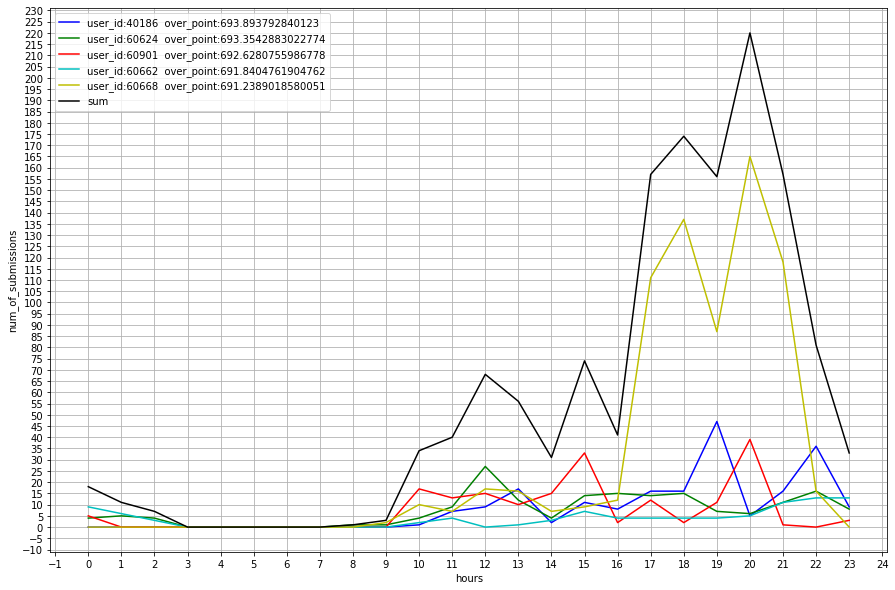

In [16]:
ax.plot(data_hours,"black",label="sum")
ax.legend(loc = "best")
fig.savefig("temp/hours_with_sum.png")
fig

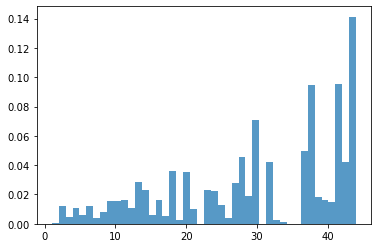

In [17]:
new_data_days = []
for i in range(1,45):
    for j in range(int(data_days.iloc[i-1,0])):
        new_data_days.append(i)

x = np.array(new_data_days)
mu =np.mean(x)
sigma =np.std(x) 
num_bins = 44
n, bins, patches = plt.hist(x, num_bins,density=1, alpha=0.75) 
y = norm.pdf(bins, mu, sigma)

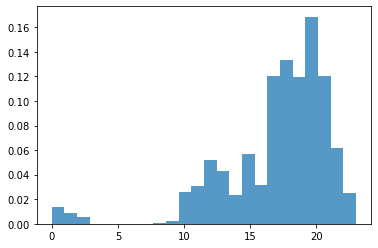

In [18]:
new_data_hours = []
for i in range(24):
    for j in range(int(data_hours.iloc[i,0])):
        new_data_hours.append(i)

x = np.array(new_data_hours)
mu =np.mean(x)
sigma =np.std(x) 
num_bins = 24
n, bins, patches = plt.hist(x, num_bins,density=1, alpha=0.75) 
z = norm.pdf(bins, mu, sigma)


group7_days = data_days
group7_days_line = y
group7_hours = data_hours
group7_hours_line = z

In [19]:
data5a = pd.DataFrame({"user_id":data5.iloc[0].loc["user_id"],
                       "first_submission":data5["upload_time"].min(),
                       "last_submission":data5["upload_time"].max(),
                       "over_point":data5.iloc[0].loc["over_point"],
                       "num_of_submission":len(data5),
                       "standard_deviation_of_days":pd.array(data5.loc[:,"days"]).std(),
                       "standard_deviation_of_hours":pd.array(data5.loc[:,"hours"]).std()},
                     index=[0])
data6a = pd.DataFrame({"user_id":data6.iloc[0].loc["user_id"],
                       "first_submission":data6["upload_time"].min(),
                       "last_submission":data6["upload_time"].max(),
                       "over_point":data6.iloc[0].loc["over_point"],
                       "num_of_submission":len(data6),
                       "standard_deviation_of_days":pd.array(data6.loc[:,"days"]).std(),
                       "standard_deviation_of_hours":pd.array(data6.loc[:,"hours"]).std()},
                     index=[0])
data7a = pd.DataFrame({"user_id":data7.iloc[0].loc["user_id"],
                       "first_submission":data7["upload_time"].min(),
                       "last_submission":data7["upload_time"].max(),
                       "over_point":data7.iloc[0].loc["over_point"],
                       "num_of_submission":len(data7),
                       "standard_deviation_of_days":pd.array(data7.loc[:,"days"]).std(),
                       "standard_deviation_of_hours":pd.array(data7.loc[:,"hours"]).std()},
                     index=[0])
data8a = pd.DataFrame({"user_id":data8.iloc[0].loc["user_id"],
                       "first_submission":data8["upload_time"].min(),
                       "last_submission":data8["upload_time"].max(),
                       "over_point":data8.iloc[0].loc["over_point"],
                       "num_of_submission":len(data8),
                       "standard_deviation_of_days":pd.array(data8.loc[:,"days"]).std(),
                       "standard_deviation_of_hours":pd.array(data8.loc[:,"hours"]).std()},
                     index=[0])
data9a = pd.DataFrame({"user_id":data9.iloc[0].loc["user_id"],
                       "first_submission":data9["upload_time"].min(),
                       "last_submission":data9["upload_time"].max(),
                       "over_point":data9.iloc[0].loc["over_point"],
                       "num_of_submission":len(data9),
                       "standard_deviation_of_days":pd.array(data9.loc[:,"days"]).std(),
                       "standard_deviation_of_hours":pd.array(data9.loc[:,"hours"]).std()},
                     index=[0])
data=data5a
data=data.append(data6a,ignore_index=True)
data=data.append(data7a,ignore_index=True)
data=data.append(data8a,ignore_index=True)
data=data.append(data9a,ignore_index=True)
data.to_csv("temp/data.csv")

In [20]:
group7_days
group7_days_line
group7_hours
group7_hours_line

array([2.29010634e-05, 5.60628362e-05, 1.30426500e-04, 2.88355324e-04,
       6.05844917e-04, 1.20966836e-03, 2.29531626e-03, 4.13894930e-03,
       7.09265830e-03, 1.15504613e-02, 1.78756144e-02, 2.62902059e-02,
       3.67450089e-02, 4.88060977e-02, 6.16057391e-02, 7.38991800e-02,
       8.42421468e-02, 9.12621280e-02, 9.39556965e-02, 9.19235950e-02,
       8.54677448e-02, 7.55177162e-02, 6.34113224e-02, 5.06006543e-02,
       3.83722101e-02])

NameError: name 'group1_days' is not defined

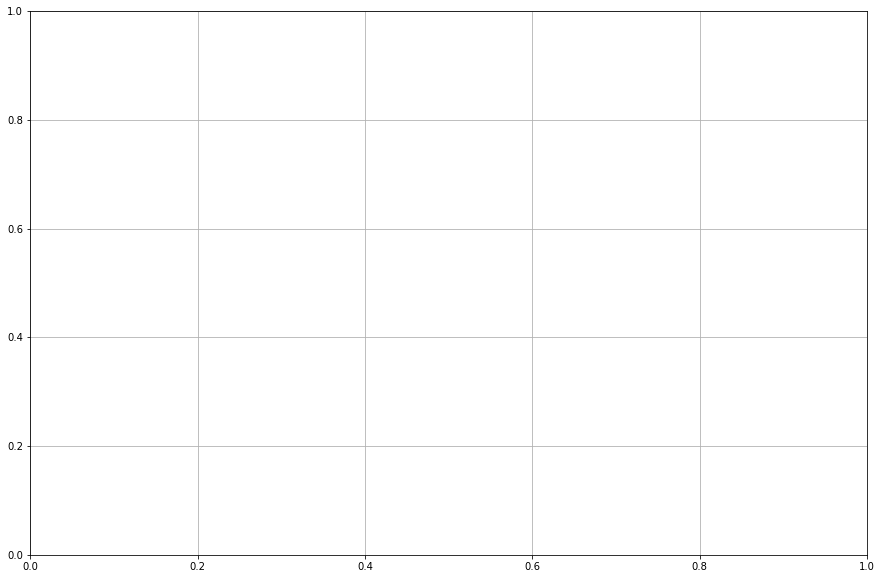

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(group1_days,"b",label="group1")
ax.plot(group2_days,"g",label="group2")
ax.plot(group3_days,"r",label="group3")
ax.plot(group4_days,"c",label="group4")
ax.plot(group5_days,"m",label="group5")
ax.plot(group6_days,"y",label="group6")
ax.plot(group7_days,"k",label="group7")

ax.legend(loc = "best")
ax.set_xlabel("days")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
fig.savefig("temp/group_days.png")

NameError: name 'group1_hours' is not defined

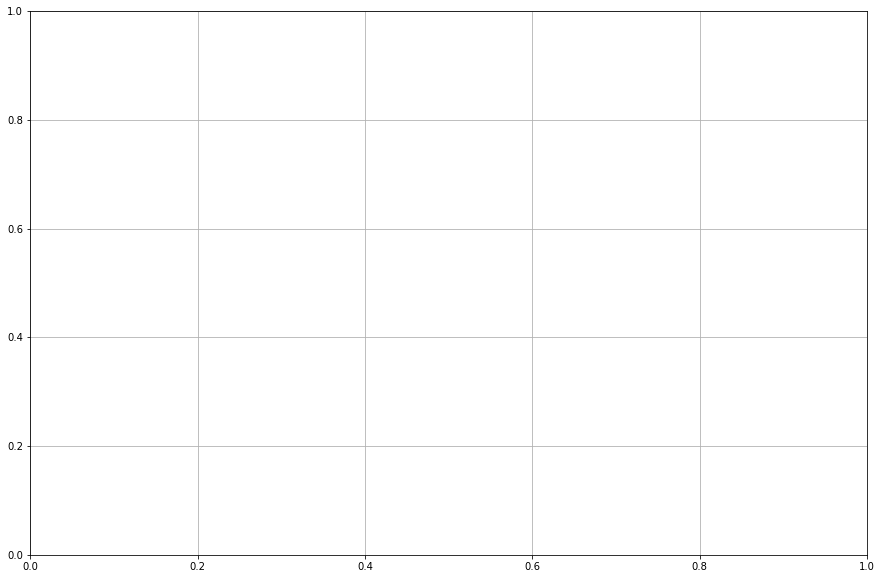

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(group1_hours,"b",label="group1")
ax.plot(group2_hours,"g",label="group2")
ax.plot(group3_hours,"r",label="group3")
ax.plot(group4_hours,"c",label="group4")
ax.plot(group5_hours,"m",label="group5")
ax.plot(group6_hours,"y",label="group6")
ax.plot(group7_hours,"k",label="group7")

ax.legend(loc = "best")
ax.set_xlabel("hours")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
fig.savefig("temp/group_hours.png")

NameError: name 'group1_days_line' is not defined

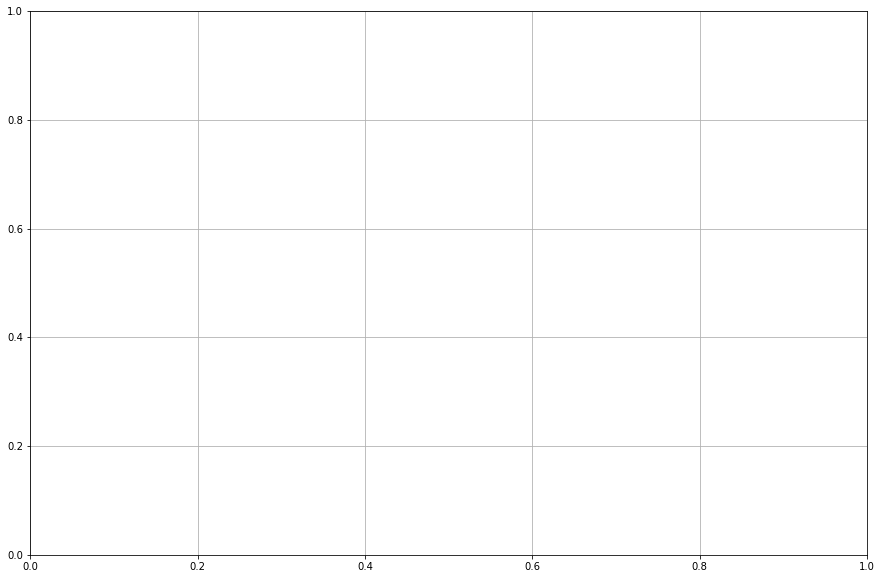

In [23]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(group1_days_line,"b",label="group1")
ax.plot(group2_days_line,"g",label="group2")
ax.plot(group3_days_line,"r",label="group3")
ax.plot(group4_days_line,"c",label="group4")
ax.plot(group5_days_line,"m",label="group5")
ax.plot(group6_days_line,"y",label="group6")
ax.plot(group7_days_line,"k",label="group7")

ax.legend(loc = "best")
ax.set_xlabel("days")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
fig.savefig("temp/group_days_line.png")

NameError: name 'group1_hours_line' is not defined

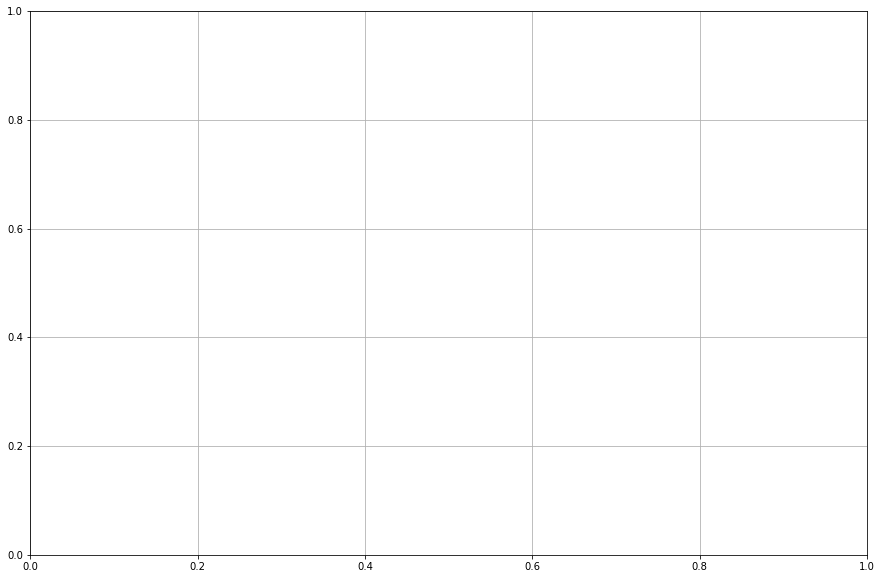

In [24]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(group1_hours_line,"b",label="group1")
ax.plot(group2_hours_line,"g",label="group2")
ax.plot(group3_hours_line,"r",label="group3")
ax.plot(group4_hours_line,"c",label="group4")
ax.plot(group5_hours_line,"m",label="group5")
ax.plot(group6_hours_line,"y",label="group6")
ax.plot(group7_hours_line,"k",label="group7")

ax.legend(loc = "best")
ax.set_xlabel("hours")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
fig.savefig("temp/group_hours_line.png")